<a href="https://colab.research.google.com/github/agnaldoseixas/Projeto_TriggoAI/blob/main/Projeto_TriggoAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Preparação dos Dados

In [2]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Criando Data Frames Pandas dos Arquivos CSV
df_customer = pd.read_csv('/content/olist_customers_dataset.csv', encoding='latin1', sep = ',')
df_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv', sep = ',')
df_order_items = pd.read_csv('/content/olist_order_items_dataset.csv', encoding='latin1', sep = ',')
df_order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv', encoding='latin1', sep = ',')
df_order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv', encoding='latin1', sep = ',')
df_orders = pd.read_csv('/content/olist_orders_dataset.csv', encoding='latin1', sep = ',')
df_products = pd.read_csv('/content/olist_products_dataset.csv', encoding='latin1', sep = ',')
df_sellers = pd.read_csv('/content/olist_sellers_dataset.csv', encoding='latin1', sep = ',')
df_product_category_name = pd.read_csv('/content/product_category_name_translation.csv', sep = ',')


In [4]:
#Verificando Tipos corretos e se existe Valores Nulos para tratar
#df_customer.info()
#df_geolocation.info()
#df_order_items.info()
#df_order_payments.info()
#df_order_reviews.info()
#df_orders.info()
#df_products.info()
#df_sellers.info()
df_product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [5]:
#Convertendo campo de object para datetime
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'], errors='coerce')
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'], errors='coerce')
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews['review_answer_timestamp'], errors='coerce')
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], errors='coerce')
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], errors='coerce')
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], errors='coerce')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], errors='coerce')
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], errors='coerce')

display(df_products)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [6]:
#Verificar campos nulos
df_products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [7]:
#Excluir linhas com campos nulos
df_products.dropna(inplace=True)
df_products.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [8]:
#Verificar linhas duplicadas
#df_customer.duplicated().sum()
#df_products.duplicated().sum()
#df_sellers.duplicated().sum()
#df_orders.duplicated().sum()
#df_order_items.duplicated().sum()
#df_order_payments.duplicated().sum()
#df_order_reviews.duplicated().sum()
#df_product_category_name.duplicated().sum()
df_geolocation.duplicated().sum()

np.int64(261831)

In [9]:
#Removendo linahs duplicadas no dataframe geolacation
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

np.int64(0)

#2-Análise Exploratória de Dados

##2.1- Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

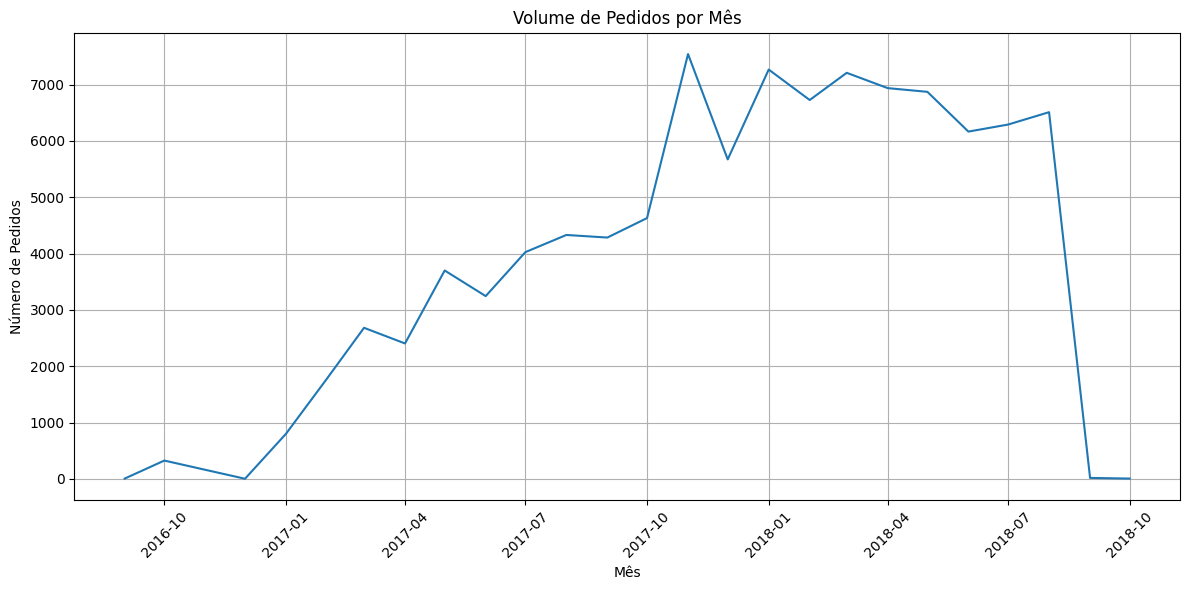

In [10]:
# Filtrando qtde de ordens por mês
ordens_mes = df_orders.groupby(df_orders['order_purchase_timestamp'].dt.to_period('M')).size()

# Convertendo o resultado para um dataframe
ordens_mes_df = ordens_mes.to_frame(name='number_of_orders')
ordens_mes_df.index = ordens_mes_df.index.to_timestamp()

# Plotando o grafico com as informações
plt.figure(figsize=(12, 6))
sns.lineplot(data=ordens_mes_df, x=ordens_mes_df.index, y='number_of_orders')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

--> O grafico mostra picos e vales sugerindo sazonalidade nas vendas.

##2.2- Qual a distribuição do tempo de entrega dos pedidos?

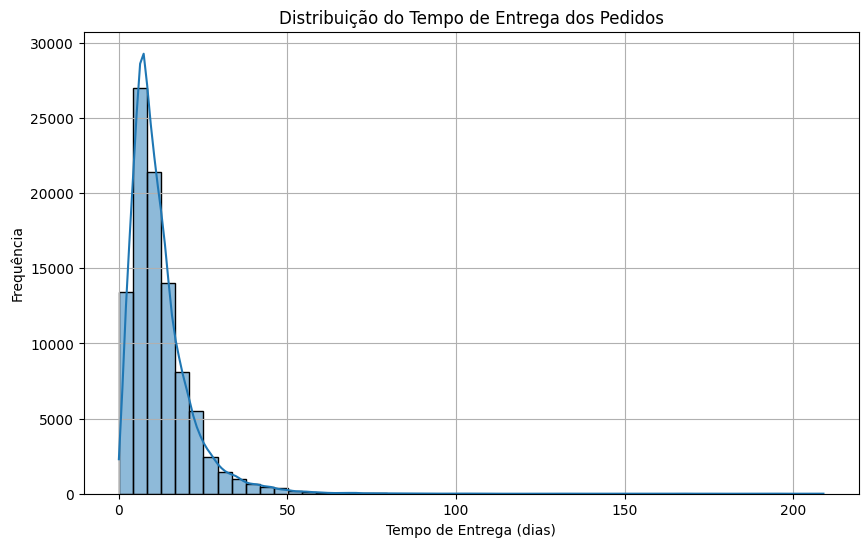

Estatísticas descritivas do tempo de entrega:
count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time, dtype: float64


In [11]:
# Calculando o tempo de entrega
df_orders['delivery_time'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days

# Removendo valores nulos no tempo de entrega (para pedidos que não foram entregues ainda)
delivery_times = df_orders.dropna(subset=['delivery_time'])['delivery_time']

# Plotando o tempo de entrega
plt.figure(figsize=(10, 6))
sns.histplot(delivery_times, bins=50, kde=True)
plt.title('Distribuição do Tempo de Entrega dos Pedidos')
plt.xlabel('Tempo de Entrega (dias)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


print("Estatísticas descritivas do tempo de entrega:")
print(delivery_times.describe())

##2.3- Qual a relação entre o valor do frete e a distância de entrega?

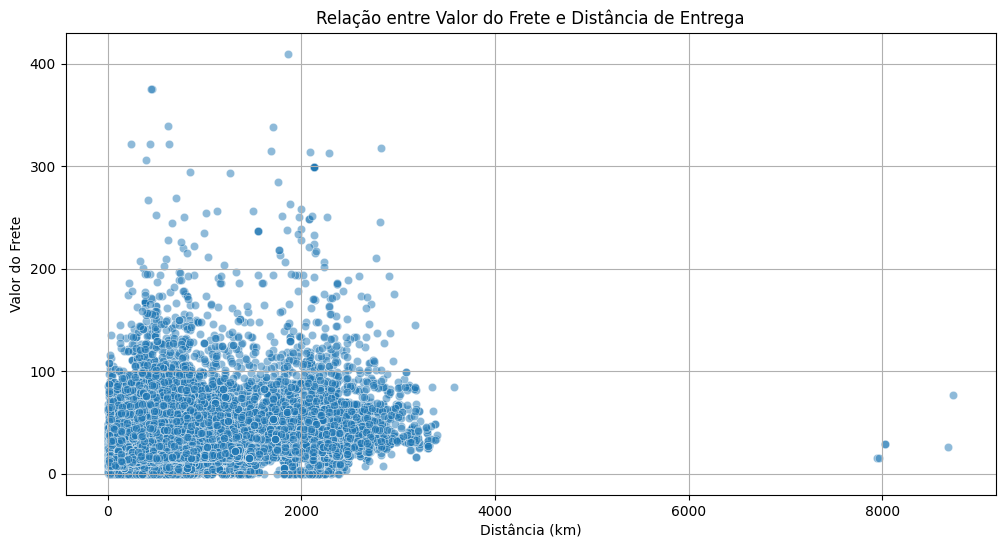

Correlação entre distância e valor do frete:
               distance_km  freight_value
distance_km       1.000000       0.388432
freight_value     0.388432       1.000000


In [12]:
!pip install haversine
from haversine import haversine, Unit

# Feito um Merge nos dataframes para relacionar Ordem, Cliente e vendedor com o zip code de cada um
df_merged = df_order_items.merge(df_orders, on='order_id')
df_merged = df_merged.merge(df_customer[['customer_id', 'customer_zip_code_prefix']], on='customer_id')
df_merged = df_merged.merge(df_sellers[['seller_id', 'seller_zip_code_prefix']], on='seller_id')

# Pegando a localização com os zip codes dos Clienets e Vendedores
df_customer_geo = df_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset='geolocation_zip_code_prefix').rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix', 'geolocation_lat': 'customer_lat', 'geolocation_lng': 'customer_lng'})
df_seller_geo = df_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].drop_duplicates(subset='geolocation_zip_code_prefix').rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix', 'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'})

df_merged = df_merged.merge(df_customer_geo, on='customer_zip_code_prefix', how='left')
df_merged = df_merged.merge(df_seller_geo, on='seller_zip_code_prefix', how='left')

# Calculando a distancia com haversine
def calculate_distance(row):
    if pd.notnull(row['customer_lat']) and pd.notnull(row['customer_lng']) and pd.notnull(row['seller_lat']) and pd.notnull(row['seller_lng']):
        return haversine((row['customer_lat'], row['customer_lng']), (row['seller_lat'], row['seller_lng']), unit=Unit.KILOMETERS)
    return None

df_merged['distance_km'] = df_merged.apply(calculate_distance, axis=1)

# Apagando os valores nulos
df_distance_freight = df_merged.dropna(subset=['distance_km', 'freight_value'])

# Plotando o grafico
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_distance_freight, x='distance_km', y='freight_value', alpha=0.5)
plt.title('Relação entre Valor do Frete e Distância de Entrega')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete')
plt.grid(True)
plt.show()

print("Correlação entre distância e valor do frete:")
print(df_distance_freight[['distance_km', 'freight_value']].corr())

##2.4- Quais são as categorias de produtos mais vendidas em termos de faturamento?

In [13]:
# Mesclando os dataframes necessários
df_merged = df_order_items.merge(df_orders, on='order_id')
df_merged = df_merged.merge(df_products, on='product_id')
df_merged = df_merged.merge(df_product_category_name, on='product_category_name')

# Calculando o faturamento por categoria de produto
faturamento_por_categoria = df_merged.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

#TOP 10 das categorias mais vendidas
print("Categorias de produtos mais vendidas em termos de faturamento:")
print(faturamento_por_categoria.head(10))

Categorias de produtos mais vendidas em termos de faturamento:
product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64


##2.5- Quais estados brasileiros possuem o maior valor médio de pedido?

In [14]:
# Calculando o valor total pago por pedido
df_order_payments_total = df_order_payments.groupby('order_id')['payment_value'].sum().reset_index()
df_order_payments_total.rename(columns={'payment_value': 'total_payment_value'}, inplace=True)

# Mesclando com o dataframe para relacionar a Ordem
df_orders_payments = df_orders.merge(df_order_payments_total, on='order_id')

# Mesclando com o dataframe de clientes
df_orders_customers = df_orders_payments.merge(df_customer, on='customer_id')

# Calculando o valor médio do pedido por estado do cliente
avg_order_value_by_state = df_orders_customers.groupby('customer_state')['total_payment_value'].mean().sort_values(ascending=False)

# Top 10 estados com maior valor médio de pedido
print("Estados brasileiros com o maior valor médio de pedido:")
print(avg_order_value_by_state.head(10))

Estados brasileiros com o maior valor médio de pedido:
customer_state
PB    264.077836
AC    242.970617
RO    240.577866
AP    239.158824
AL    234.774964
PA    223.893179
TO    219.590464
PI    219.240343
RR    218.796087
SE    214.989286
Name: total_payment_value, dtype: float64


#3-Solução de Problemas de Negócio

##3.1-Análise de Retenção: Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no período analisado. Quais insights podemos extrair destes dados?

In [15]:
# Contagem de pedidos por cliente
customer_order_counts = df_orders.groupby('customer_id').size()

# clientes recorrentes (aqueles com mais de um pedido)
recurring_customers = customer_order_counts[customer_order_counts > 1].index

# clientes únicos
total_customers = df_orders['customer_id'].nunique()

# clientes recorrentes
num_recurring_customers = len(recurring_customers)

# taxa de clientes recorrentes
retention_rate = (num_recurring_customers / total_customers) * 100

print(f"Número total de clientes únicos: {total_customers}")
print(f"Número de clientes recorrentes: {num_recurring_customers}")
print(f"Taxa de clientes recorrentes: {retention_rate:.2f}%")

print("\nInsights:")
if retention_rate > 0:
  print("- A taxa de clientes recorrentes indica que há clientes que retornam para fazer novas compras. Isso é um bom sinal de satisfação do cliente ou de necessidade contínua dos produtos.")
else:
  print("- A taxa de clientes recorrentes é 0%, o que sugere que os clientes não estão retornando para fazer novas compras. Isso pode indicar problemas com a satisfação do cliente, a oferta de produtos ou a experiência de compra.")

print("- A taxa esta baixa, pode ser necessário investigar as causas (ex: qualidade do produto, atendimento ao cliente, preços, concorrência) e implementar ações para aumentar a fidelização.")
print("- Para aumentar a retenção, estratégias como programas de fidelidade, ofertas personalizadas e melhoria na experiência pós-venda podem ser eficazes.")

Número total de clientes únicos: 99441
Número de clientes recorrentes: 0
Taxa de clientes recorrentes: 0.00%

Insights:
- A taxa de clientes recorrentes é 0%, o que sugere que os clientes não estão retornando para fazer novas compras. Isso pode indicar problemas com a satisfação do cliente, a oferta de produtos ou a experiência de compra.
- A taxa esta baixa, pode ser necessário investigar as causas (ex: qualidade do produto, atendimento ao cliente, preços, concorrência) e implementar ações para aumentar a fidelização.
- Para aumentar a retenção, estratégias como programas de fidelidade, ofertas personalizadas e melhoria na experiência pós-venda podem ser eficazes.


##3.2-Predição de Atraso: Crie um modelo simples para prever se um pedido será entregue com atraso.

Defina o que seria um pedido atrasado (baseado nas colunas disponíveis)
Use os campos relevantes para criar features para seu modelo
Divida o dataset em treino e teste
Implemente um modelo de classificação simples (pode usar Regressão Logística, Random Forest ou outro de sua escolha)
Avalie a performance do modelo e explique os resultados

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Definir se um pedido está atrasado

df_orders_pred = df_orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date']).copy()

df_orders_pred['is_late'] = (df_orders_pred['order_delivered_customer_date'] > df_orders_pred['order_estimated_delivery_date']).astype(int)

# features relevantes para a predição de atraso
df_orders_pred['estimated_delivery_time_days'] = (df_orders_pred['order_estimated_delivery_date'] - df_orders_pred['order_purchase_timestamp']).dt.days
df_orders_pred['purchase_dayofweek'] = df_orders_pred['order_purchase_timestamp'].dt.dayofweek
df_orders_pred['purchase_month'] = df_orders_pred['order_purchase_timestamp'].dt.month


features = ['estimated_delivery_time_days', 'purchase_dayofweek', 'purchase_month']
target = 'is_late'

# Removendo linhas com valores nulos
df_orders_pred.dropna(subset=features, inplace=True)

X = df_orders_pred[features]
y = df_orders_pred[target]

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Usar stratify para manter a proporção de classes (atrasado/não atrasado)

# Implementar um modelo de classificação simples (Regressão Logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a performance do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Explicação dos resultados
print("\nExplicação dos Resultados do Modelo de Predição de Atraso:")
print("O modelo de Regressão Logística foi treinado para prever se um pedido será entregue com atraso (Classe 1) ou não (Classe 0) com base no tempo estimado de entrega em dias, dia da semana da compra e mês da compra.")
print("O Relatório de Classificação fornece métricas importantes:")
print("- **Precisão (Precision):** Das vezes que o modelo previu 'atraso', quantos pedidos realmente foram atrasados.")
print("- **Recall (Revocação):** Dos pedidos que realmente foram atrasados, quantos o modelo conseguiu identificar.")
print("- **F1-score:** É uma média harmônica entre precisão e recall, útil para avaliar modelos em datasets com classes desbalanceadas.")
print("- **Support:** O número de ocorrências de cada classe no conjunto de teste.")
print("\nA Matriz de Confusão mostra o número de: ")
print("- **Verdadeiros Positivos (True Positives - TP):** Pedidos atrasados previstos corretamente como atrasados.")
print("- **Verdadeiros Negativos (True Negatives - TN):** Pedidos não atrasados previstos corretamente como não atrasados.")
print("- **Falsos Positivos (False Positives - FP):** Pedidos não atrasados previstos incorretamente como atrasados (Erros Tipo I).")
print("- **Falsos Negativos (False Negatives - FN):** Pedidos atrasados previstos incorretamente como não atrasados (Erros Tipo II).")

print("\nAnálise das Métricas:")
print(f"- A precisão para a classe 1 (atrasado) indica a confiança do modelo quando ele prediz um atraso.")
print(f"- O recall para a classe 1 (atrasado) indica a capacidade do modelo de encontrar todos os pedidos atrasados.")
print(f"- Um baixo recall para a classe 1 (atrasado) indica que o modelo está falhando em identificar muitos pedidos que realmente atrasaram. Isso é um 'Falso Negativo'.")
print(f"- Um baixo F1-score para a classe 1 (atrasado) sugere que o modelo tem dificuldade em prever atrasos com equilíbrio entre precisão e recall.")
print("É importante analisar o equilíbrio entre Falsos Positivos e Falsos Negativos dependendo do custo de cada tipo de erro para o negócio.")
print("Este é um modelo base simples. Para melhorar a predição, seria necessário incluir mais features relevantes (como informações do vendedor, do produto, localização detalhada, etc.), realizar engenharia de features mais complexa e experimentar outros modelos de classificação mais avançados.")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     26595
           1       0.00      0.00      0.00      2348

    accuracy                           0.92     28943
   macro avg       0.46      0.50      0.48     28943
weighted avg       0.84      0.92      0.88     28943


Matriz de Confusão:
[[26595     0]
 [ 2348     0]]

Explicação dos Resultados do Modelo de Predição de Atraso:
O modelo de Regressão Logística foi treinado para prever se um pedido será entregue com atraso (Classe 1) ou não (Classe 0) com base no tempo estimado de entrega em dias, dia da semana da compra e mês da compra.
O Relatório de Classificação fornece métricas importantes:
- **Precisão (Precision):** Das vezes que o modelo previu 'atraso', quantos pedidos realmente foram atrasados.
- **Recall (Revocação):** Dos pedidos que realmente foram atrasados, quantos o modelo conseguiu identificar.
- **F1-score:** É uma média harmônica entr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##3.3-Segmentação de Clientes: Utilize técnicas de clustering para segmentar os clientes em grupos. Analise o comportamento de cada grupo e sugira estratégias de marketing específicas para cada um.

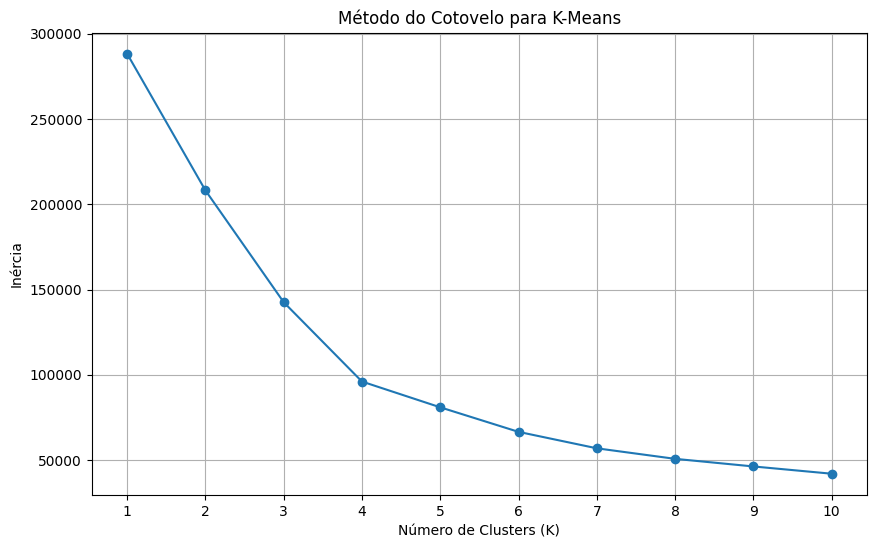


Análise dos Clusters (Médias RFM):
   Cluster     Recency  Frequency     Monetary
1        1  178.366677   1.000000   135.169989
2        2  269.306212   2.116475   290.305945
3        3  289.490091   1.015690  1196.225244
0        0  438.803699   1.000000   134.926653


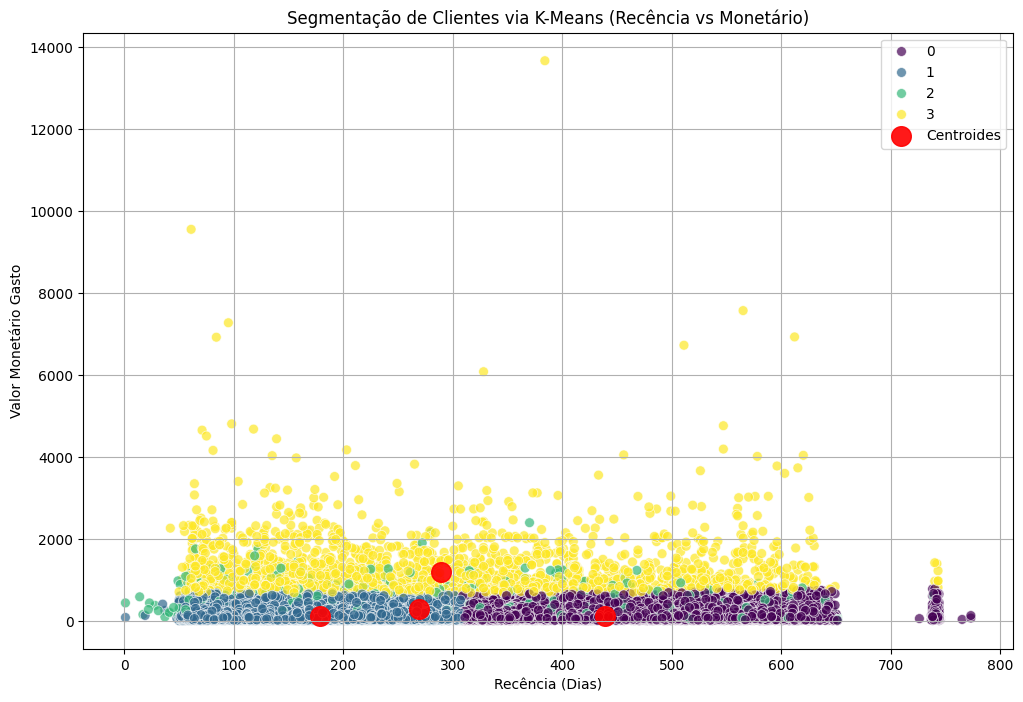


Estratégias de Marketing Sugeridas por Cluster:

--- Cluster 0 ---
  - Recência Média: 438.80 dias
  - Frequência Média: 1.00 compras
  - Valor Monetário Médio: R$ 134.93
  - Perfil: Clientes Adormecidos de Alto Potencial. Compraram há um tempo, não frequentemente, mas gastaram bem.
  - Estratégias: Campanhas de reativação direcionadas, destacar novidades de produtos relevantes, ofertas de 'última chance'.

--- Cluster 1 ---
  - Recência Média: 178.37 dias
  - Frequência Média: 1.00 compras
  - Valor Monetário Médio: R$ 135.17
  - Perfil: Clientes Novos Promissores / Clientes com Alta Cesta Média. Compraram recentemente, mas não frequentemente, gastaram bastante em uma ou poucas compras.
  - Estratégias: Incentivar a repetição de compra com ofertas personalizadas, apresentar outros produtos relacionados, melhorar a experiência de pós-compra.

--- Cluster 2 ---
  - Recência Média: 269.31 dias
  - Frequência Média: 2.12 compras
  - Valor Monetário Médio: R$ 290.31
  - Perfil: Clientes Q

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Vamos utilizar RFM (Recência, Frequência, Valor Monetário) para a segmentação
# Recência: Dias desde a última compra
# Frequência: Número total de compras
# Valor Monetário: Total gasto

# Mesclar dataframes necessários para obter informações do cliente, pedidos e pagamentos
df_customer_orders = df_customer.merge(df_orders, on='customer_id')
df_customer_orders_payments = df_customer_orders.merge(df_order_payments, on='order_id')

# Calcular RFM
# A data de referência para a recência será o dia após a data da última compra no dataset
latest_date = df_customer_orders_payments['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = df_customer_orders_payments.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda date: (latest_date - date.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('payment_value', 'sum')
).reset_index()

# Lidar com possíveis valores infinitos ou muito grandes/pequenos (outliers)
# Vamos remover clientes com Monetary = 0 ou com valores de Recency/Frequency que pareçam incorretos
rfm_df = rfm_df[rfm_df['Monetary'] > 0]
# Opcional: Remover outliers extremos (ex: Monetary > percentil 99.5)
# rfm_df = rfm_df[rfm_df['Monetary'] < rfm_df['Monetary'].quantile(0.995)]


# Aplicar StandardScaler para normalizar os dados RFM
# É importante que os dados estejam na mesma escala para o K-Means
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Encontrar o número ótimo de clusters usando o Método do Cotovelo (Elbow Method)
inertia = []
K_range = range(1, 11) # Testar de 1 a 10 clusters
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Adicionado n_init
  kmeans.fit(rfm_scaled)
  inertia.append(kmeans.inertia_)

# Plotar o Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Baseado no gráfico do cotovelo, escolha um número de clusters (por exemplo, 3, 4 ou 5)
# Suponha que escolhemos K=4 (este valor pode variar dependendo do gráfico gerado)
n_clusters = 4 # <--- Ajuste este valor com base no gráfico do cotovelo

# Aplicar K-Means com o número de clusters escolhido
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Adicionado n_init
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analisar o comportamento de cada grupo
# Visualizar a média das métricas RFM para cada cluster
cluster_analysis = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print("\nAnálise dos Clusters (Médias RFM):")
print(cluster_analysis.sort_values(by='Recency')) # Ordenar por Recência para ver os clientes mais recentes/antigos

# Visualização dos clusters (exemplo com Recency vs Monetary)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=50, alpha=0.7)
# Plotar os centroides dos clusters
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.9, label='Centroides')
plt.title('Segmentação de Clientes via K-Means (Recência vs Monetário)')
plt.xlabel('Recência (Dias)')
plt.ylabel('Valor Monetário Gasto')
plt.legend()
plt.grid(True)
plt.show()

# Sugestões de estratégias de marketing específicas para cada grupo
print("\nEstratégias de Marketing Sugeridas por Cluster:")

for cluster_id in cluster_analysis['Cluster']:
  recency_avg = cluster_analysis[cluster_analysis['Cluster'] == cluster_id]['Recency'].values[0]
  frequency_avg = cluster_analysis[cluster_analysis['Cluster'] == cluster_id]['Frequency'].values[0]
  monetary_avg = cluster_analysis[cluster_analysis['Cluster'] == cluster_id]['Monetary'].values[0]

  print(f"\n--- Cluster {cluster_id} ---")
  print(f"  - Recência Média: {recency_avg:.2f} dias")
  print(f"  - Frequência Média: {frequency_avg:.2f} compras")
  print(f"  - Valor Monetário Médio: R$ {monetary_avg:.2f}")

  # Interpretação e sugestões baseadas nas médias RFM
  if recency_avg <= rfm_df['Recency'].median(): # Clientes mais recentes
    if frequency_avg > rfm_df['Frequency'].median(): # Clientes frequentes
      if monetary_avg > rfm_df['Monetary'].median(): # Alto valor monetário
        print("  - Perfil: Clientes de Alto Valor (Campeões). Compraram recentemente, compram frequentemente e gastam bastante.")
        print("  - Estratégias: Recompensa pela fidelidade, ofertas exclusivas para manter a lealdade, programas VIP, apresentar novos produtos.")
      else: # Baixo valor monetário
        print("  - Perfil: Clientes Fiéis Potenciais. Compraram recentemente, compram frequentemente, mas gastam menos.")
        print("  - Estratégias: Oferecer descontos em produtos de maior valor, bundles, programas de upgrade, incentivar a compra de produtos mais caros.")
    else: # Clientes pouco frequentes
      if monetary_avg > rfm_df['Monetary'].median(): # Alto valor monetário
        print("  - Perfil: Clientes Novos Promissores / Clientes com Alta Cesta Média. Compraram recentemente, mas não frequentemente, gastaram bastante em uma ou poucas compras.")
        print("  - Estratégias: Incentivar a repetição de compra com ofertas personalizadas, apresentar outros produtos relacionados, melhorar a experiência de pós-compra.")
      else: # Baixo valor monetário
        print("  - Perfil: Clientes Novos Padrão. Compraram recentemente, não frequentemente, gastaram pouco.")
        print("  - Estratégias: Nutrir o relacionamento com e-mails de boas-vindas, apresentar o catálogo de produtos, oferecer um pequeno desconto na próxima compra para incentivar a frequência.")
  else: # Clientes menos recentes
    if frequency_avg > rfm_df['Frequency'].median(): # Clientes frequentes no passado
      if monetary_avg > rfm_df['Monetary'].median(): # Alto valor monetário no passado
        print("  - Perfil: Clientes Quase Adormecidos / Clientes de Alto Valor do Passado. Compraram há um tempo, mas compravam frequentemente e gastavam bem.")
        print("  - Estratégias: Campanhas de reengajamento com ofertas atraentes, e-mails lembrando de compras anteriores, pesquisas de satisfação para entender o motivo da inatividade.")
      else: # Baixo valor monetário no passado
        print("  - Perfil: Clientes em Risco. Compraram há um tempo, compravam frequentemente mas gastavam pouco.")
        print("  - Estratégias: Ofertas de baixo valor para incentivar a volta, comunicação focada em valor e benefícios, entender o motivo da inatividade.")
    else: # Clientes pouco frequentes no passado
      if monetary_avg > rfm_df['Monetary'].median(): # Alto valor monetário em poucas compras passadas
         print("  - Perfil: Clientes Adormecidos de Alto Potencial. Compraram há um tempo, não frequentemente, mas gastaram bem.")
         print("  - Estratégias: Campanhas de reativação direcionadas, destacar novidades de produtos relevantes, ofertas de 'última chance'.")
      else: # Baixo valor monetário em poucas compras passadas
        print("  - Perfil: Clientes Perdidos. Compraram há um tempo, não frequentemente, e gastaram pouco.")
        print("  - Estratégias: Foco em adquirir novos clientes, mas pode-se tentar uma campanha de reativação muito genérica com baixo investimento ou focar em pesquisa para entender porque pararam de comprar.")

# Exemplo de como ver quais clientes pertencem a um cluster específico
# print("\nExemplo de clientes no Cluster 0:")
# print(rfm_df[rfm_df['Cluster'] == 0].head())

##3.4-Análise de Satisfação: Explore a relação entre a nota de avaliação dos clientes e diferentes aspectos como categoria do produto, tempo de entrega, valor do pedido, etc. Identifique fatores que mais impactam na satisfação do cliente.


Relação entre Nota de Avaliação e Categoria do Produto:
product_category_name_english
cds_dvds_musicals                        4.642857
fashion_childrens_clothes                4.500000
books_general_interest                   4.446266
costruction_tools_tools                  4.444444
flowers                                  4.419355
books_imported                           4.400000
books_technical                          4.368421
food_drink                               4.315412
luggage_accessories                      4.315257
small_appliances_home_oven_and_coffee    4.302632
Name: review_score, dtype: float64
product_category_name_english
audio                                3.825485
furniture_mattress_and_upholstery    3.815789
fashio_female_clothing               3.780000
party_supplies                       3.767442
fixed_telephony                      3.683206
fashion_male_clothing                3.641221
home_comfort_2                       3.629630
office_furniture          

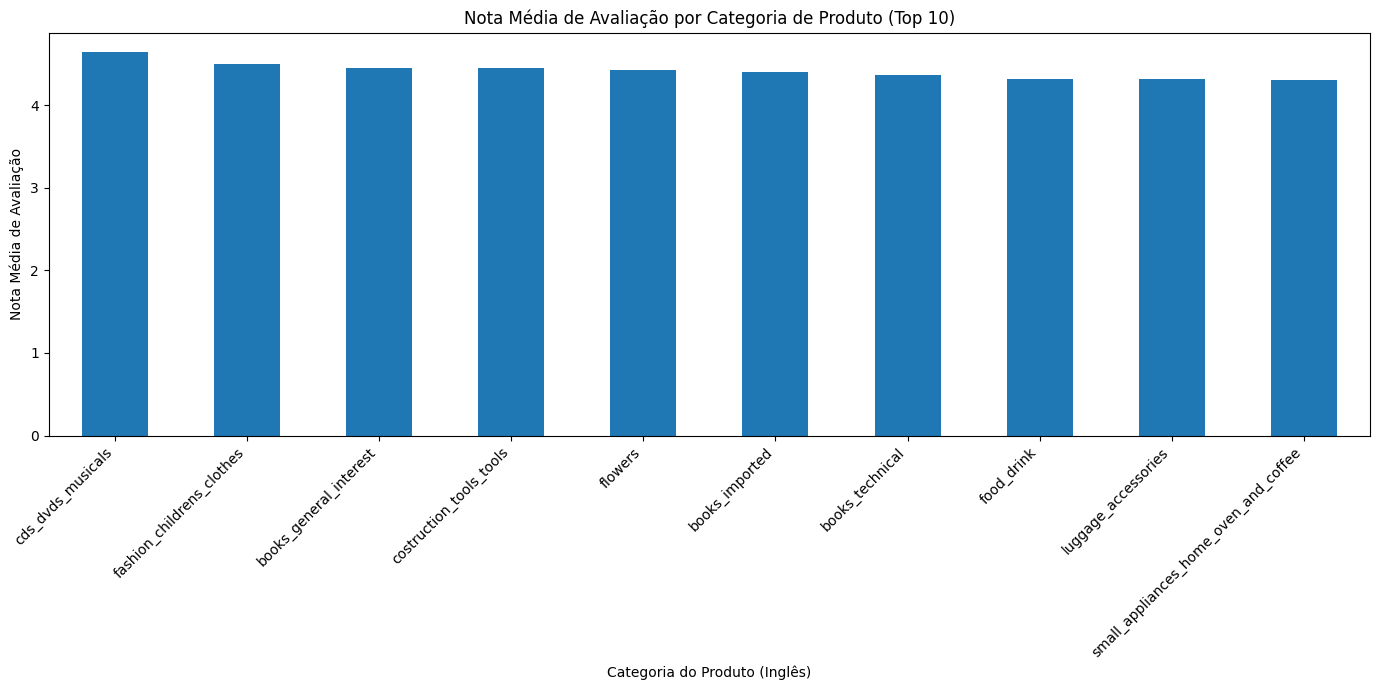

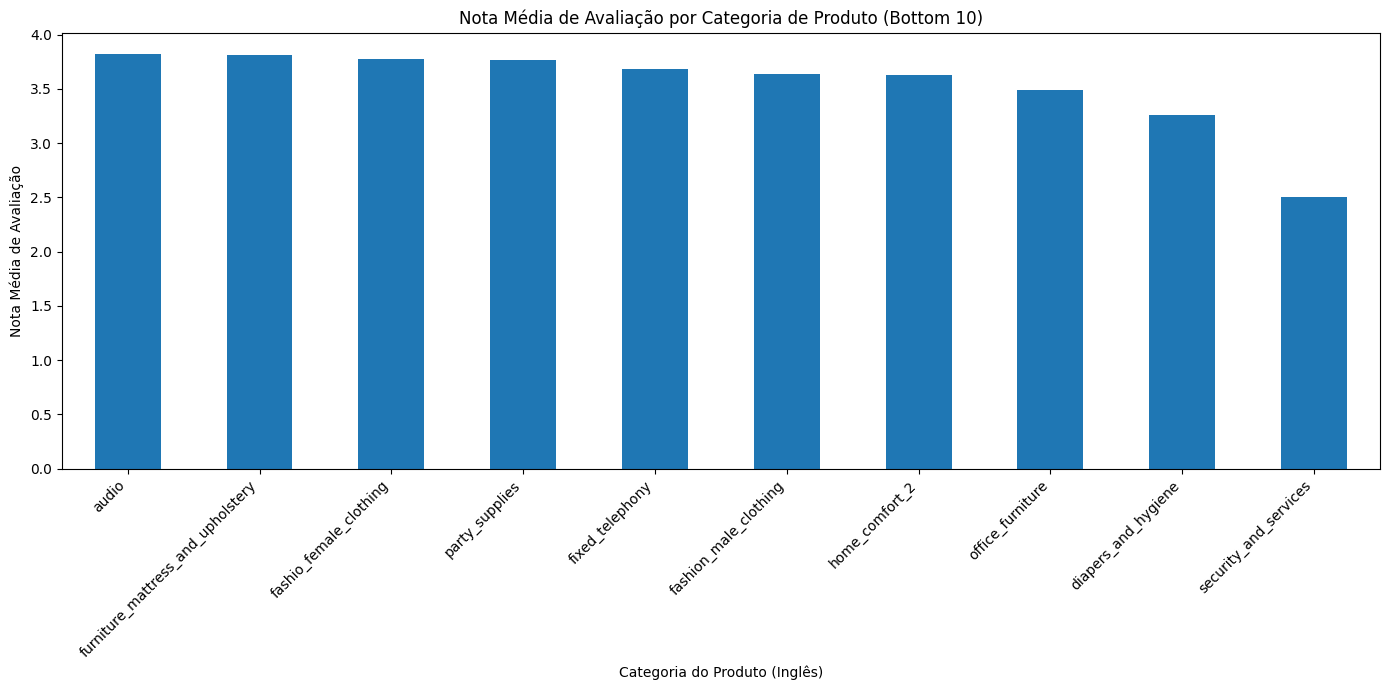


Relação entre Nota de Avaliação e Tempo de Entrega:


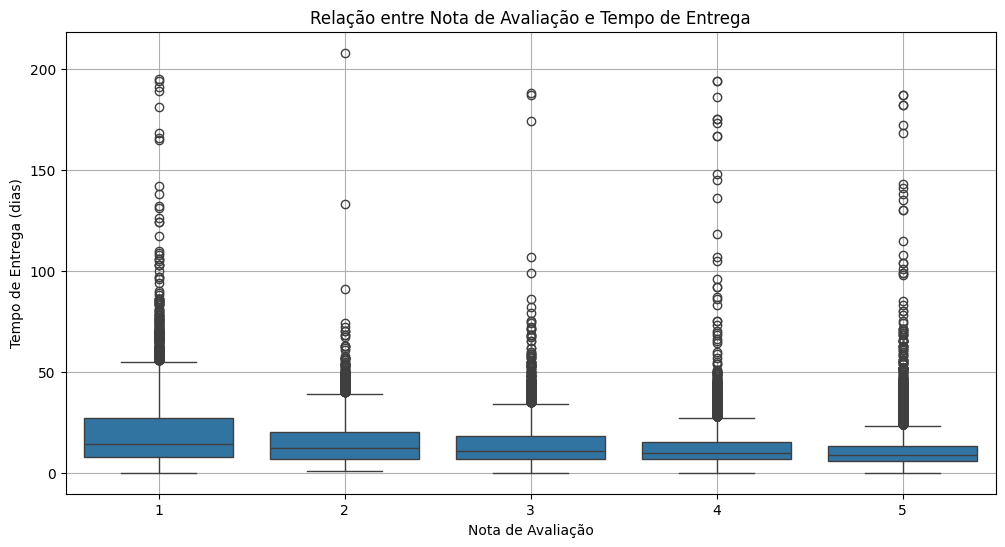

Correlação entre Tempo de Entrega e Nota de Avaliação:
               delivery_time  review_score
delivery_time        1.00000      -0.30489
review_score        -0.30489       1.00000

Nota Média por Faixa de Tempo de Entrega:
delivery_time_bin
(-0.208, 20.8]    4.226934
(20.8, 41.6]      3.245408
(41.6, 62.4]      1.727557
(62.4, 83.2]      2.058824
(83.2, 104.0]     2.263158
(104.0, 124.8]    2.266667
(124.8, 145.6]    3.214286
(145.6, 166.4]    2.000000
(166.4, 187.2]    3.875000
(187.2, 208.0]    2.125000
Name: review_score, dtype: float64

Relação entre Nota de Avaliação e Valor do Pedido:


<ipython-input-19-606cce34e76c>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_delivery_review.groupby('delivery_time_bin')['review_score'].mean())


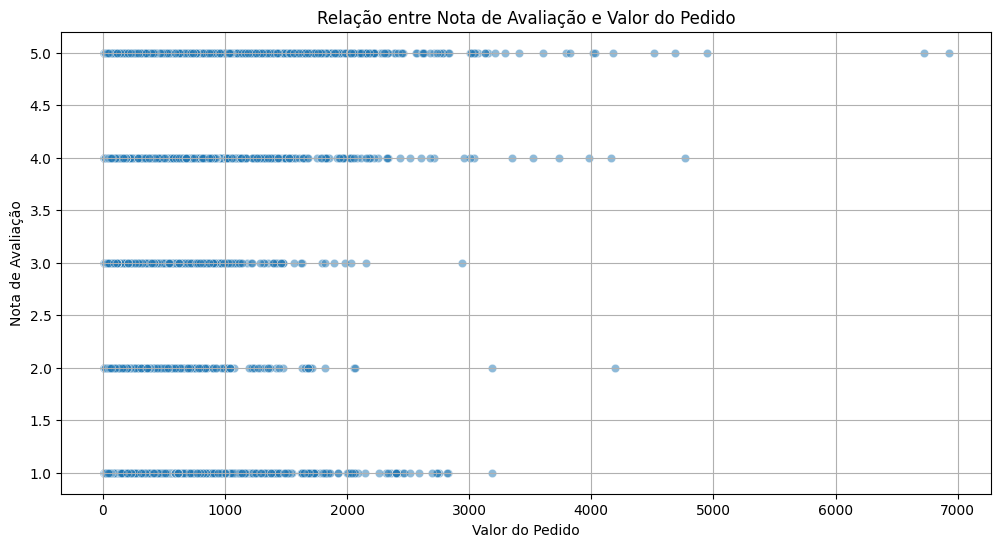

Correlação entre Valor do Pedido e Nota de Avaliação:
              order_value  review_score
order_value      1.000000     -0.007487
review_score    -0.007487      1.000000

Nota Média por Faixa de Valor do Pedido:
order_value_bin
(-0.843, 698.403]       4.036371
(698.403, 1390.726]     4.046645
(1390.726, 2083.049]    3.632911
(2083.049, 2775.372]    3.918605
(2775.372, 3467.695]    4.192308
(3467.695, 4160.018]    4.625000
(4160.018, 4852.341]    4.166667
(4852.341, 5544.664]    5.000000
(5544.664, 6236.987]         NaN
(6236.987, 6929.31]     5.000000
Name: review_score, dtype: float64

Relação entre Nota de Avaliação e Tipo de Pagamento:
payment_type
debit_card     4.168084
credit_card    4.087637
boleto         4.086631
voucher        4.003804
not_defined    1.666667
Name: review_score, dtype: float64


<ipython-input-19-606cce34e76c>:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_reviews_full.groupby('order_value_bin')['review_score'].mean())


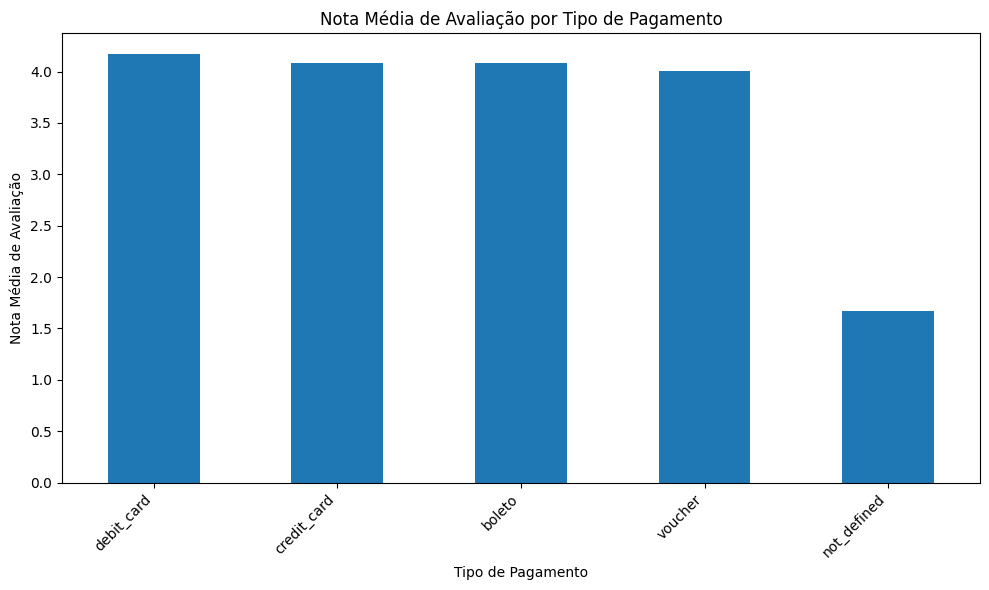


Identificação dos Fatores que Mais Impactam na Satisfação do Cliente:
- **Tempo de Entrega:** O boxplot e a correlação indicam que tempos de entrega mais longos tendem a estar associados a notas de avaliação mais baixas. Clientes valorizam entregas rápidas e dentro do prazo estimado.
- **Categoria do Produto:** Existem diferenças significativas na nota média entre as categorias. Algumas categorias consistentemente recebem notas mais altas, enquanto outras recebem notas mais baixas. Isso pode refletir a qualidade do produto, expectativas do cliente, ou problemas específicos da cadeia de suprimentos para certas categorias.
- **Valor do Pedido:** A correlação parece baixa, mas a análise por faixa de valor pode revelar nuances. Às vezes, pedidos de muito alto ou muito baixo valor podem ter características diferentes em termos de satisfação.
- **Tipo de Pagamento:** Não parece haver uma relação forte entre o tipo de pagamento e a nota de avaliação, indicando que o método de pagamento em si

In [19]:
# Mesclar os dataframes necessários para relacionar reviews, pedidos, itens de pedido, produtos e categorias
df_reviews_orders = df_order_reviews.merge(df_orders, on='order_id')
df_reviews_orders_items = df_reviews_orders.merge(df_order_items, on='order_id')
df_reviews_orders_items_products = df_reviews_orders_items.merge(df_products, on='product_id')
df_reviews_full = df_reviews_orders_items_products.merge(df_product_category_name, on='product_category_name')

# Calcular tempo de entrega
df_reviews_full['delivery_time'] = (df_reviews_full['order_delivered_customer_date'] - df_reviews_full['order_purchase_timestamp']).dt.days

# Calcular o valor total do pedido (sumarizando itens do pedido e frete)
df_reviews_full['order_value'] = df_reviews_full['price'] + df_reviews_full['freight_value']

# Fatores a serem analisados com a nota de avaliação:
# 1. Categoria do Produto
# 2. Tempo de Entrega
# 3. Valor do Pedido
# 4. Tipo de Pagamento (opcional, mas relevante)
# 5. Seller (opcional, mas relevante)

# 1. Relação entre Nota de Avaliação e Categoria do Produto
print("\nRelação entre Nota de Avaliação e Categoria do Produto:")
# Calcular a nota média por categoria
avg_review_score_by_category = df_reviews_full.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)
print(avg_review_score_by_category.head(10)) # Top 10 categorias com maior nota média
print(avg_review_score_by_category.tail(10)) # Bottom 10 categorias com menor nota média

# Visualizar (pode ser um gráfico de barras para as top/bottom categorias)
plt.figure(figsize=(14, 7))
avg_review_score_by_category.head(10).plot(kind='bar')
plt.title('Nota Média de Avaliação por Categoria de Produto (Top 10)')
plt.xlabel('Categoria do Produto (Inglês)')
plt.ylabel('Nota Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
avg_review_score_by_category.tail(10).plot(kind='bar')
plt.title('Nota Média de Avaliação por Categoria de Produto (Bottom 10)')
plt.xlabel('Categoria do Produto (Inglês)')
plt.ylabel('Nota Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Relação entre Nota de Avaliação e Tempo de Entrega
print("\nRelação entre Nota de Avaliação e Tempo de Entrega:")
# Precisamos garantir que 'delivery_time' não tenha valores nulos para esta análise
df_delivery_review = df_reviews_full.dropna(subset=['delivery_time']).copy()

# Visualizar a relação usando um boxplot ou scatter plot com agregação
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_delivery_review, x='review_score', y='delivery_time')
plt.title('Relação entre Nota de Avaliação e Tempo de Entrega')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Tempo de Entrega (dias)')
plt.grid(True)
plt.show()

# Calcular a correlação (pode não ser linear, mas dá uma ideia)
print("Correlação entre Tempo de Entrega e Nota de Avaliação:")
print(df_delivery_review[['delivery_time', 'review_score']].corr())

# Analisar a nota média para diferentes ranges de tempo de entrega
print("\nNota Média por Faixa de Tempo de Entrega:")
df_delivery_review['delivery_time_bin'] = pd.cut(df_delivery_review['delivery_time'], bins=10) # Dividir em 10 faixas
print(df_delivery_review.groupby('delivery_time_bin')['review_score'].mean())

# 3. Relação entre Nota de Avaliação e Valor do Pedido
print("\nRelação entre Nota de Avaliação e Valor do Pedido:")

# Visualizar usando um scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_reviews_full, x='order_value', y='review_score', alpha=0.5)
plt.title('Relação entre Nota de Avaliação e Valor do Pedido')
plt.xlabel('Valor do Pedido')
plt.ylabel('Nota de Avaliação')
plt.grid(True)
plt.show()

# Calcular a correlação
print("Correlação entre Valor do Pedido e Nota de Avaliação:")
print(df_reviews_full[['order_value', 'review_score']].corr())

# Analisar a nota média para diferentes ranges de valor do pedido
print("\nNota Média por Faixa de Valor do Pedido:")
df_reviews_full['order_value_bin'] = pd.cut(df_reviews_full['order_value'], bins=10) # Dividir em 10 faixas
print(df_reviews_full.groupby('order_value_bin')['review_score'].mean())


# 4. Relação entre Nota de Avaliação e Tipo de Pagamento
print("\nRelação entre Nota de Avaliação e Tipo de Pagamento:")
# Mesclar com informações de pagamento
df_reviews_payments = df_order_reviews.merge(df_order_payments, on='order_id')
avg_review_score_by_payment_type = df_reviews_payments.groupby('payment_type')['review_score'].mean().sort_values(ascending=False)
print(avg_review_score_by_payment_type)

# Visualizar
plt.figure(figsize=(10, 6))
avg_review_score_by_payment_type.plot(kind='bar')
plt.title('Nota Média de Avaliação por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Nota Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise Final: Fatores que mais impactam na satisfação do cliente
print("\nIdentificação dos Fatores que Mais Impactam na Satisfação do Cliente:")
print("- **Tempo de Entrega:** O boxplot e a correlação indicam que tempos de entrega mais longos tendem a estar associados a notas de avaliação mais baixas. Clientes valorizam entregas rápidas e dentro do prazo estimado.")
print("- **Categoria do Produto:** Existem diferenças significativas na nota média entre as categorias. Algumas categorias consistentemente recebem notas mais altas, enquanto outras recebem notas mais baixas. Isso pode refletir a qualidade do produto, expectativas do cliente, ou problemas específicos da cadeia de suprimentos para certas categorias.")
print("- **Valor do Pedido:** A correlação parece baixa, mas a análise por faixa de valor pode revelar nuances. Às vezes, pedidos de muito alto ou muito baixo valor podem ter características diferentes em termos de satisfação.")
print("- **Tipo de Pagamento:** Não parece haver uma relação forte entre o tipo de pagamento e a nota de avaliação, indicando que o método de pagamento em si não é um fator primário de satisfação ou insatisfação.")
print("- **Seller:** A variação na nota média entre os sellers sugere fortemente que o desempenho do seller (qualidade do produto, comunicação, embalagem, etc.) é um fator crucial na satisfação do cliente.")
print("- **Insights Adicionais:** Análises mais profundas podem incluir a análise do sentimento dos comentários de review, a relação entre a discrepância entre o tempo de entrega estimado e real com a nota, ou a análise de satisfação por região geográfica.")

print("\nConclusão:")
print("Com base nesta análise exploratória, o **tempo de entrega** e o desempenho individual dos **sellers** parecem ser os fatores com maior impacto na satisfação do cliente. A **categoria do produto** também é relevante, possivelmente refletindo a qualidade intrínseca dos produtos ou problemas logísticos associados a eles. Para melhorar a satisfação geral, a empresa deve focar em otimizar a logística de entrega e trabalhar de perto com os sellers para garantir a qualidade do produto e do serviço.")

#4-Visualização e Dashboards

##4.1-Um dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto

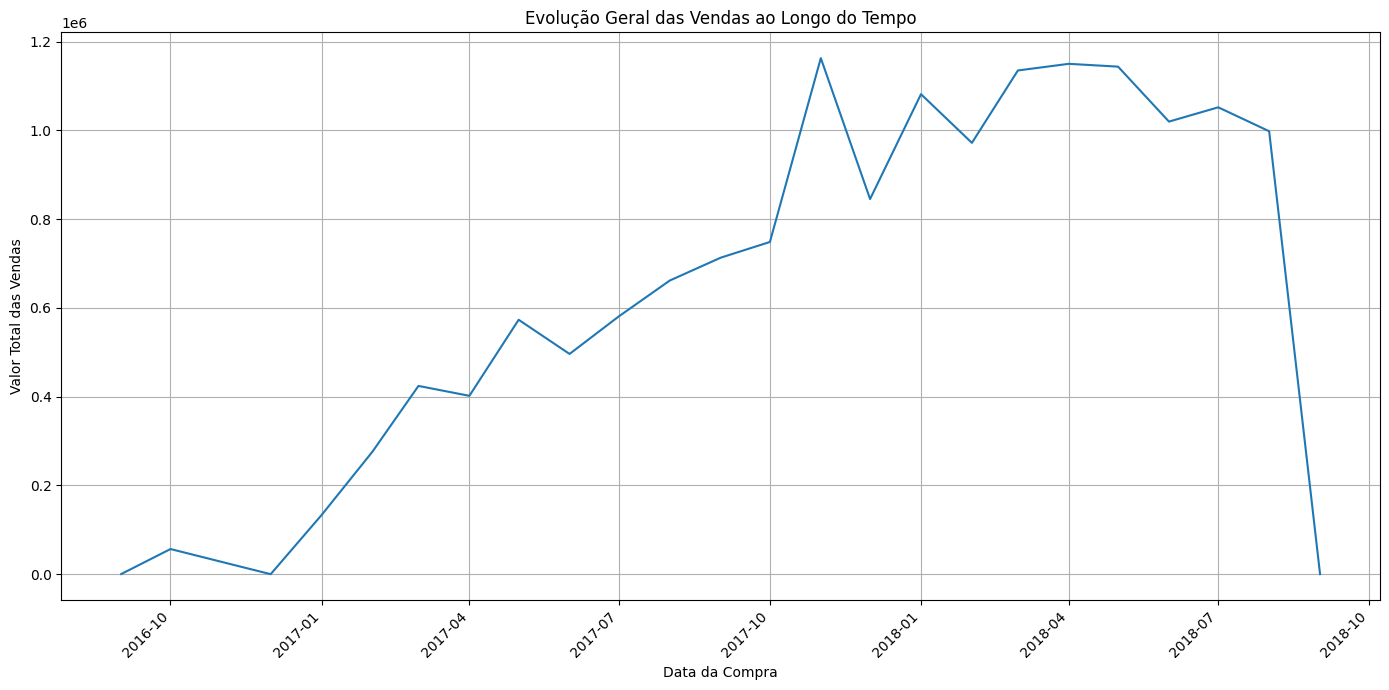


--- Filtrar os dados para um estado e categoria específicos ---


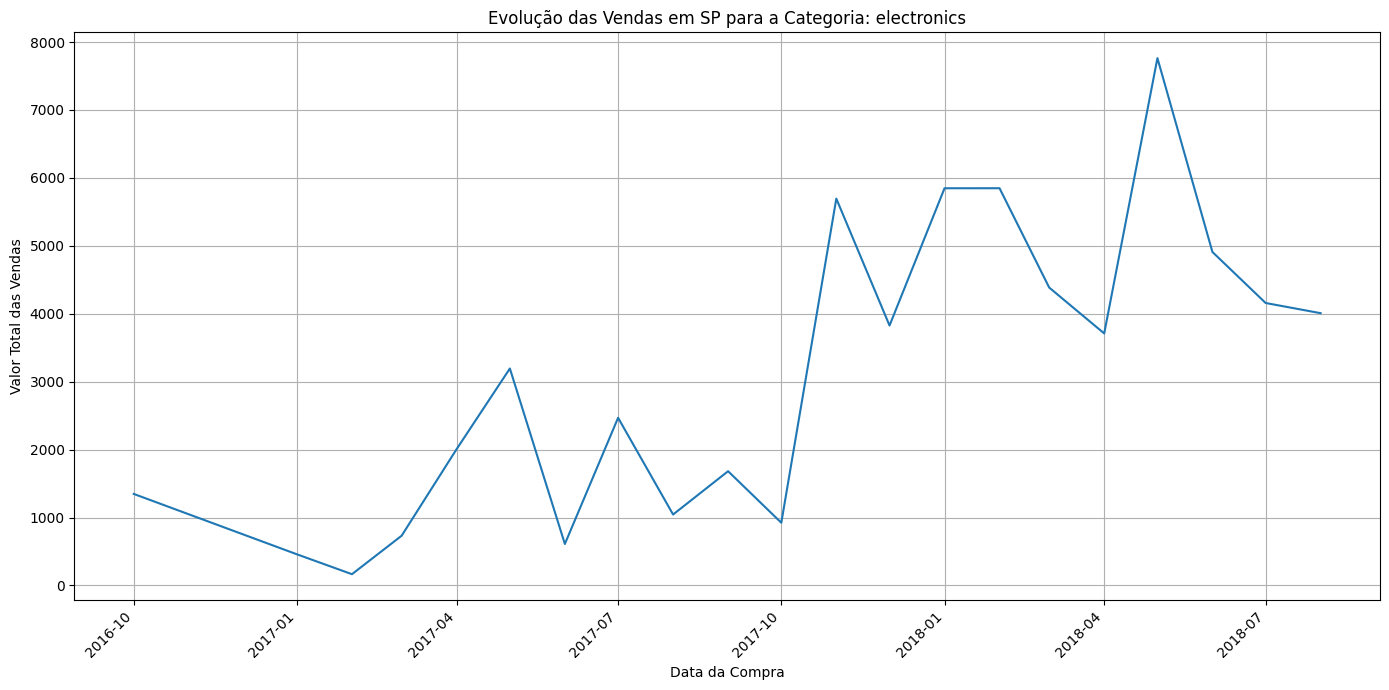

In [24]:
# Mesclar dataframes necessários para relacionar ordens, itens de pedido, produtos, categorias e clientes (para obter o estado do cliente)
df_dashboard = df_orders.merge(df_order_items, on='order_id')
df_dashboard = df_dashboard.merge(df_products, on='product_id')
df_dashboard = df_dashboard.merge(df_product_category_name, on='product_category_name')
df_dashboard = df_dashboard.merge(df_customer[['customer_id', 'customer_state']], on='customer_id')

# Garantir que a coluna de data seja datetime
df_dashboard['order_purchase_timestamp'] = pd.to_datetime(df_dashboard['order_purchase_timestamp'])

# Calcular o valor da venda (preço do item + frete)
df_dashboard['sale_value'] = df_dashboard['price'] + df_dashboard['freight_value']

# Extrair o mês/ano da data da compra para o eixo do tempo
df_dashboard['order_month'] = df_dashboard['order_purchase_timestamp'].dt.to_period('M')

# Agrupar os dados por Mês, Estado e Categoria para obter o total de vendas
sales_over_time_by_state_category = df_dashboard.groupby(['order_month', 'customer_state', 'product_category_name_english'])['sale_value'].sum().reset_index()

# Converter o período de volta para timestamp para plotagem
sales_over_time_by_state_category['order_month'] = sales_over_time_by_state_category['order_month'].dt.to_timestamp()

# Agrupar as vendas totais por mês para o gráfico geral
total_sales_over_time = df_dashboard.groupby('order_month')['sale_value'].sum().reset_index()
total_sales_over_time['order_month'] = total_sales_over_time['order_month'].dt.to_timestamp()


plt.figure(figsize=(14, 7))
sns.lineplot(data=total_sales_over_time, x='order_month', y='sale_value')
plt.title('Evolução Geral das Vendas ao Longo do Tempo')
plt.xlabel('Data da Compra')
plt.ylabel('Valor Total das Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Filtrar os dados para um estado e categoria específicos ---")

# Exemplo: Filtrar para o estado de São Paulo (SP) e a categoria 'electronics'
estado_filtrado = 'SP'
categoria_filtrada = 'electronics' # Use o nome da categoria em inglês

sales_filtered = sales_over_time_by_state_category[
    (sales_over_time_by_state_category['customer_state'] == estado_filtrado) &
    (sales_over_time_by_state_category['product_category_name_english'] == categoria_filtrada)
]

if not sales_filtered.empty:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=sales_filtered, x='order_month', y='sale_value')
    plt.title(f'Evolução das Vendas em {estado_filtrado} para a Categoria: {categoria_filtrada}')
    plt.xlabel('Data da Compra')
    plt.ylabel('Valor Total das Vendas')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Não há dados de vendas para o estado '{estado_filtrado}' e categoria '{categoria_filtrada}' no período.")


##4.2-Um mapa de calor mostrando a concentração de vendas por região/estado do Brasil

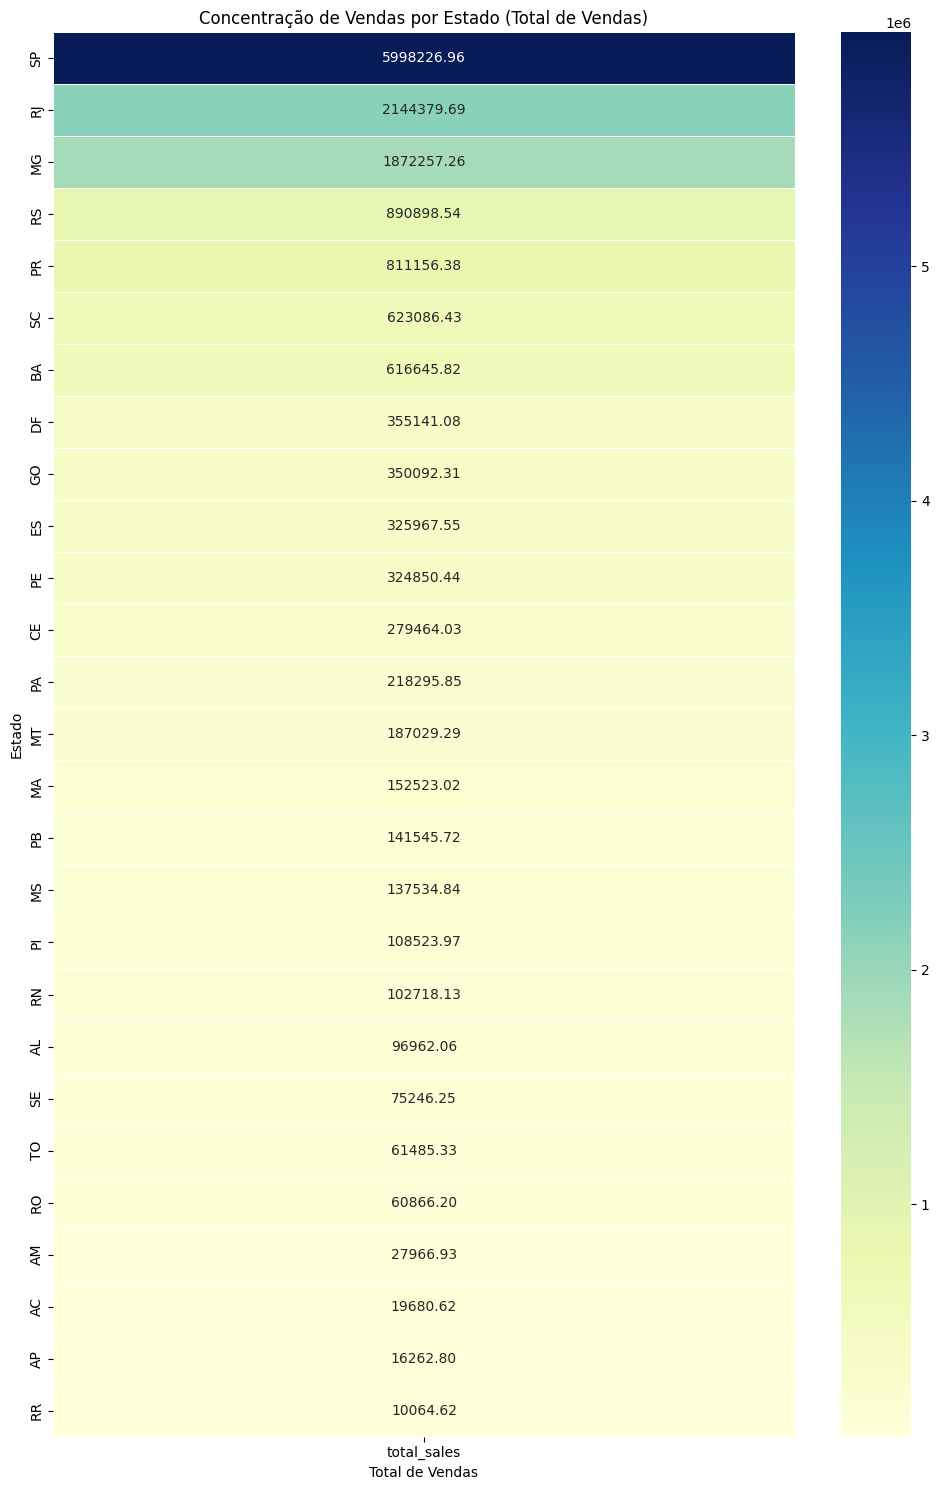

In [27]:
# Mesclar dataframes para obter o estado do cliente e o valor do pagamento
df_sales_geo = df_orders.merge(df_customer[['customer_id', 'customer_state']], on='customer_id')
df_sales_geo = df_sales_geo.merge(df_order_payments.groupby('order_id')['payment_value'].sum().reset_index(), on='order_id')

# Agrupar pelo estado do cliente e somar o valor total das vendas
sales_by_state = df_sales_geo.groupby('customer_state')['payment_value'].sum().reset_index()

# Renomear colunas para facilitar o merge com dados geo (se necessário, mas aqui usaremos apenas os nomes dos estados)
sales_by_state.rename(columns={'customer_state': 'state', 'payment_value': 'total_sales'}, inplace=True)

# Ordenar os estados pelo total de vendas para uma visualização mais clara no heatmap tabular
sales_by_state_sorted = sales_by_state.sort_values(by='total_sales', ascending=False)

# Preparar os dados para o heatmap tabular (uma coluna com o total de vendas por estado)
heatmap_data = sales_by_state_sorted.set_index('state')[['total_sales']]

plt.figure(figsize=(10, 15)) # Ajuste o tamanho para acomodar todos os estados
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=.5)
plt.title('Concentração de Vendas por Estado (Total de Vendas)')
plt.xlabel('Total de Vendas')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


##4.3-Um conjunto de gráficos que apresente a relação entre avaliação do cliente e tempo de entrega


## Relação entre Nota de Avaliação e Tempo de Entrega ##


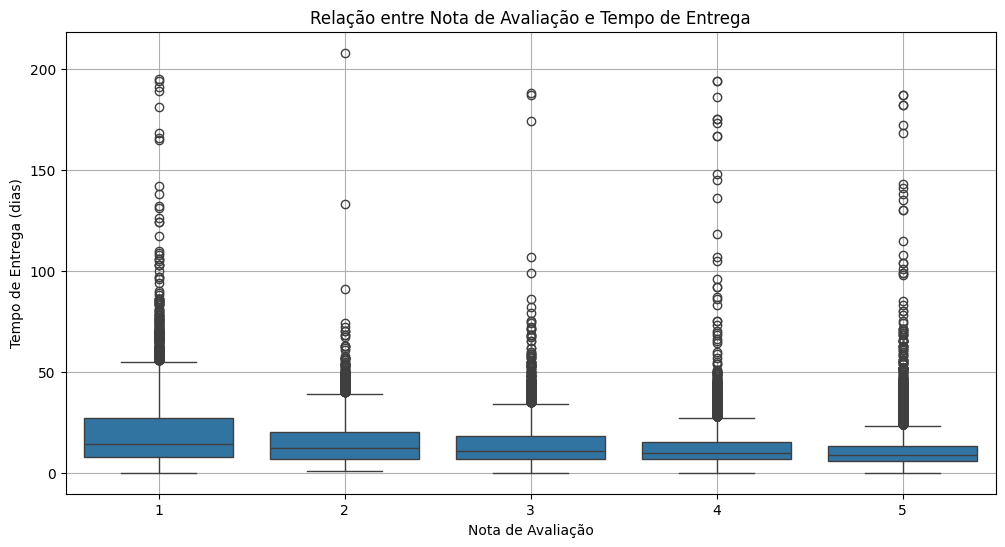


Nota Média por Faixa de Tempo de Entrega:


<ipython-input-29-34c6be16b805>:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



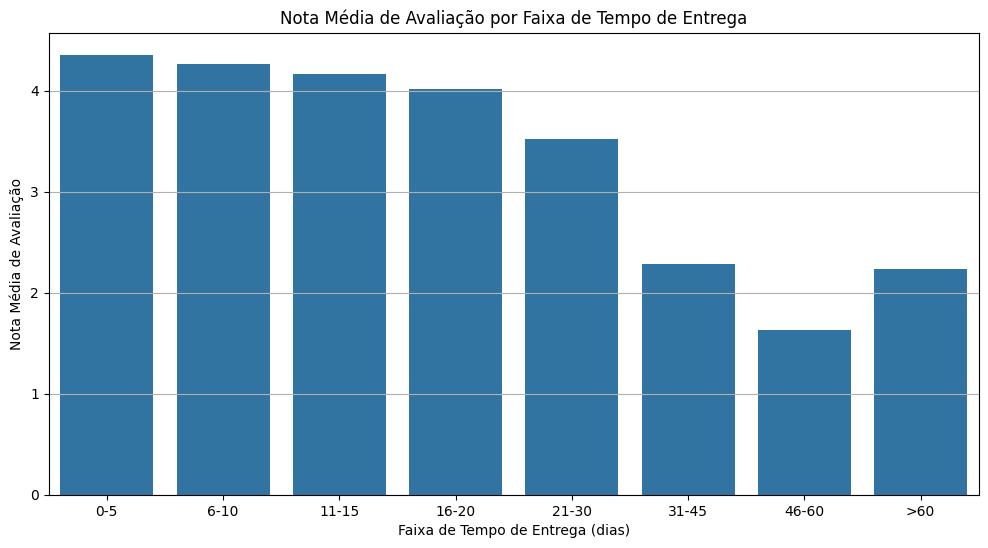


Insights:
- Os gráficos mostram claramente que à medida que o tempo de entrega aumenta, a nota média de avaliação do cliente tende a diminuir.
- Clientes que recebem seus pedidos mais rapidamente geralmente atribuem notas mais altas.
- Tempos de entrega prolongados são um fator significativo para a insatisfação do cliente, resultando em notas mais baixas.
- O boxplot ilustra que a dispersão dos tempos de entrega também varia com a nota. Notas baixas (1 e 2) mostram uma grande variabilidade e a presença de tempos de entrega muito longos.
- Esta análise reforça a importância da eficiência logística para a satisfação do cliente. Investimentos em processos de entrega mais rápidos e confiáveis podem ter um impacto positivo direto nas avaliações dos clientes.


In [29]:
# 2. Relação entre Nota de Avaliação e Tempo de Entrega
print("\n## Relação entre Nota de Avaliação e Tempo de Entrega ##")
# Precisamos garantir que 'delivery_time' não tenha valores nulos para esta análise
df_delivery_review = df_reviews_full.dropna(subset=['delivery_time']).copy()

# Visualizar a relação usando um boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_delivery_review, x='review_score', y='delivery_time')
plt.title('Relação entre Nota de Avaliação e Tempo de Entrega')
plt.xlabel('Nota de Avaliação')
plt.ylabel('Tempo de Entrega (dias)')
plt.grid(True)
plt.show()

# Analisar a nota média para diferentes ranges de tempo de entrega
print("\nNota Média por Faixa de Tempo de Entrega:")
# Para evitar muitos bins e tornar a visualização mais clara, vamos usar menos bins ou faixas específicas
bins = [0, 5, 10, 15, 20, 30, 45, 60, df_delivery_review['delivery_time'].max()]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-45', '46-60', '>60']
df_delivery_review['delivery_time_bin'] = pd.cut(df_delivery_review['delivery_time'], bins=bins, labels=labels, right=True, include_lowest=True)

avg_review_score_by_delivery_bin = df_delivery_review.groupby('delivery_time_bin')['review_score'].mean().reset_index()

# Visualizar como um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_review_score_by_delivery_bin, x='delivery_time_bin', y='review_score', order=labels)
plt.title('Nota Média de Avaliação por Faixa de Tempo de Entrega')
plt.xlabel('Faixa de Tempo de Entrega (dias)')
plt.ylabel('Nota Média de Avaliação')
plt.grid(axis='y')
plt.show()

print("\nInsights:")
print("- Os gráficos mostram claramente que à medida que o tempo de entrega aumenta, a nota média de avaliação do cliente tende a diminuir.")
print("- Clientes que recebem seus pedidos mais rapidamente geralmente atribuem notas mais altas.")
print("- Tempos de entrega prolongados são um fator significativo para a insatisfação do cliente, resultando em notas mais baixas.")
print("- O boxplot ilustra que a dispersão dos tempos de entrega também varia com a nota. Notas baixas (1 e 2) mostram uma grande variabilidade e a presença de tempos de entrega muito longos.")
print("- Esta análise reforça a importância da eficiência logística para a satisfação do cliente. Investimentos em processos de entrega mais rápidos e confiáveis podem ter um impacto positivo direto nas avaliações dos clientes.")


##4.4-Um dashboard de análise dos vendedores, mostrando quais têm melhor desempenho em termos de volume de vendas, satisfação do cliente e tempo de entrega


--- Vendedores com Melhor Desempenho em Faturamento ---
                             seller_id  volume_vendas  faturamento_total
857   4869f7a5dfa277a7dca6462dcf3b52b2           1156          229472.63
1013  53243585a1d6dc2643021fd1853d8905            410          222776.05
881   4a3ca9315b744ce9f8e9374361493884           1987          200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94            586          194042.03
1535  7c67e1448b00f6e969d365cea6b010ab           1364          187923.89
1560  7e93a43ef30c4f03f38b393420bc753a            340          176431.87
2643  da8622b14eb17ae2831f4ac5b9dab84a           1551          160236.57
1505  7a67c85e85bb2ce8582c35f2203ad736           1171          141745.53
192   1025f0e2d44d7041d6cf58b6550e0bfa           1428          138968.55
1824  955fee9216a65b617aa5c0531780ce60           1499          135171.70


<ipython-input-33-98a3786ed79a>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




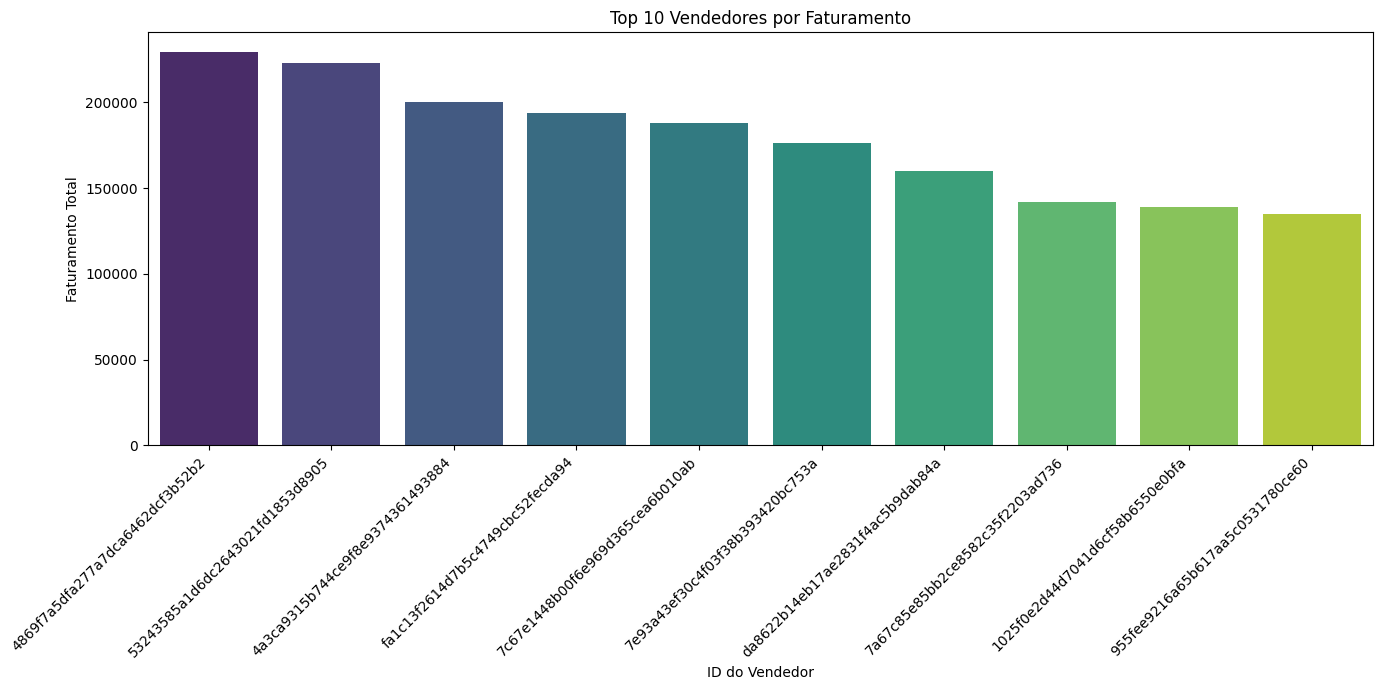


--- Vendedores com Melhor Nota Média de Avaliação ---
                             seller_id  nota_media_avaliacao
3067  feb793c88d836c3a75efa4b5a3465d70                   5.0
2760  e59e575a175fadcadf8479e191770425                   5.0
2757  e595809a6c31ec4314fd06ef198c244d                   5.0
2754  e560e4022d8f7aebf155db95946c5c0f                   5.0
2753  e5545d4d4473876ea78c5bcebca365c3                   5.0
669   392f7f2c797e4dc077e4311bde2ab8ce                   5.0
600   333c4210e76a1aa2ab817b99437e3ff1                   5.0
597   32f83ffe11cd40f7adcf4eef171f52d9                   5.0
595   32e5635e63cb374eb63afdd242fb6134                   5.0
663   38f276ca6e7cc95a6d1bb55ac9e5550f                   5.0


<ipython-input-33-98a3786ed79a>:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




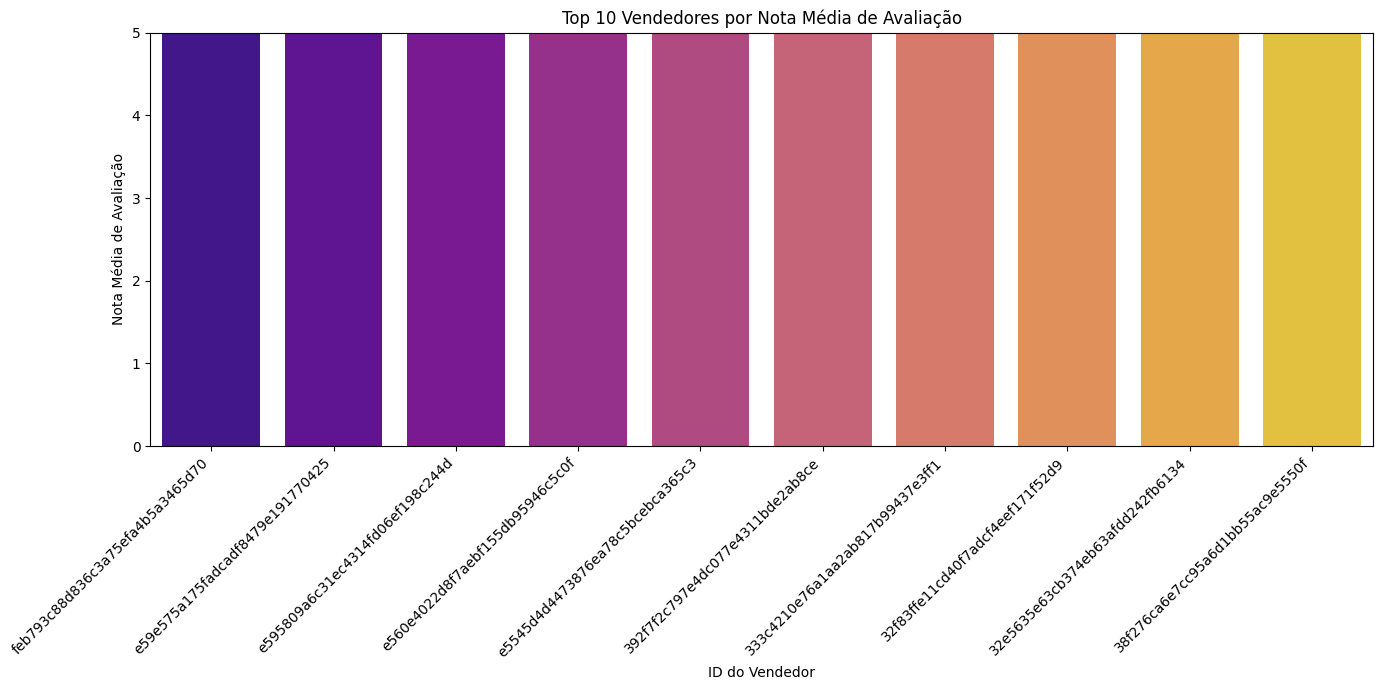


--- Vendedores com Melhor Tempo Médio de Entrega (Menor) ---
                             seller_id  tempo_medio_entrega_dias
1215  674207551483fec113276b67b0d871ff                       1.0
1191  6561d6bf844e464b4019442692b40e02                       1.0
2826  f3511c85f59f8dec53d140501ee8e7a8                       1.0
1778  96f7c797de9ca20efbe14545bed63eec                       1.0
1118  5e063e85d44b0f5c3e6ec3131103a57e                       1.0
224   139157dd4daa45c25b0807ffff348363                       1.0
505   2c00c85d30361cd2ced2969cffbbffa3                       1.0
1319  702835e4b785b67a084280efca355756                       1.0
1393  751e274377499a8503fd6243ad9c56f6                       1.0
1371  734def04b237117a09321dd6d8f3f2a2                       1.5


<ipython-input-33-98a3786ed79a>:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




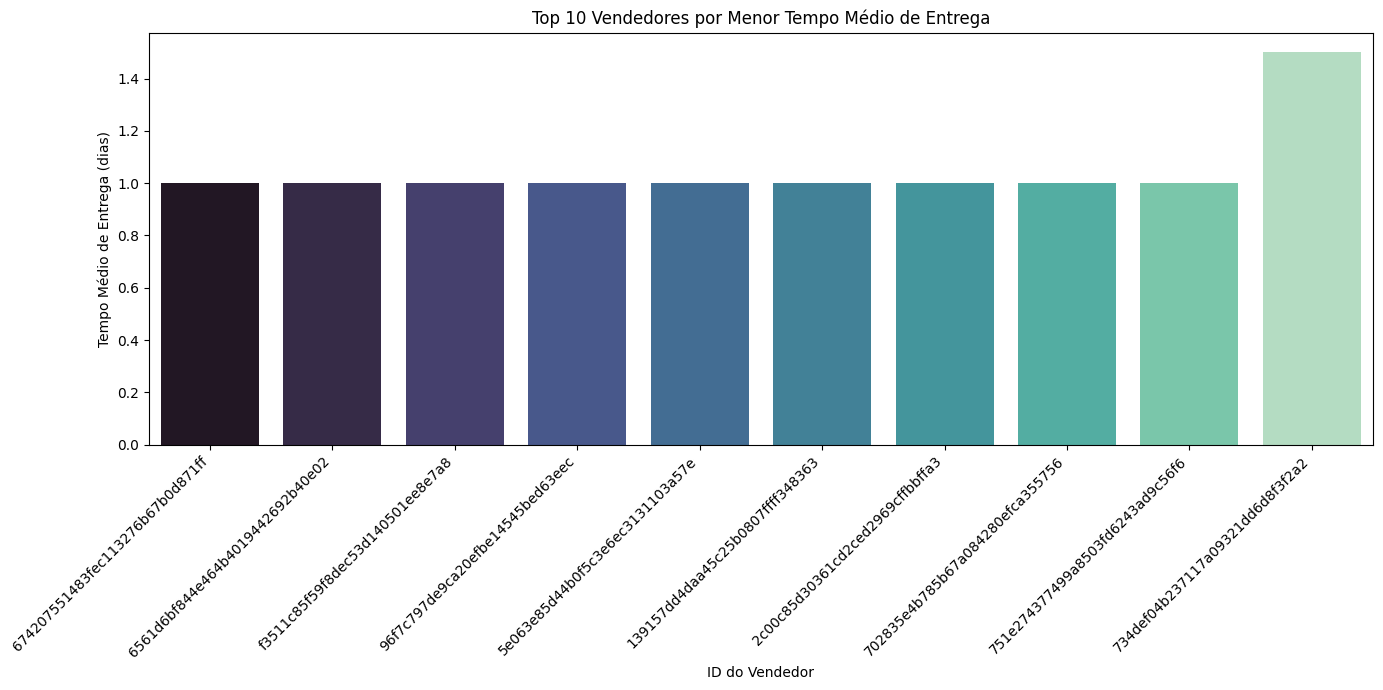

<ipython-input-33-98a3786ed79a>:81: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-33-98a3786ed79a>:82: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d


--- Análise Combinada de Vendedores (Amostra) ---
                             seller_id  volume_vendas  faturamento_total  \
857   4869f7a5dfa277a7dca6462dcf3b52b2           1156          229472.63   
1013  53243585a1d6dc2643021fd1853d8905            410          222776.05   
881   4a3ca9315b744ce9f8e9374361493884           1987          200472.92   
3024  fa1c13f2614d7b5c4749cbc52fecda94            586          194042.03   
1535  7c67e1448b00f6e969d365cea6b010ab           1364          187923.89   

      nota_media_avaliacao  tempo_medio_entrega_dias  
857               4.122822                 14.549652  
1013              4.075980                 12.940000  
881               3.803931                 13.939456  
3024              4.340206                 12.839378  
1535              3.348208                 21.945387  


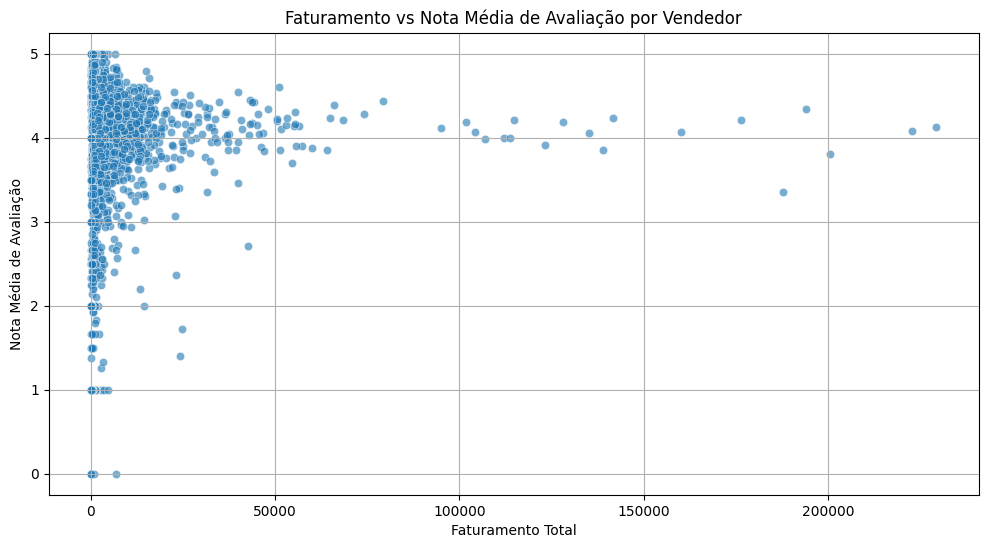

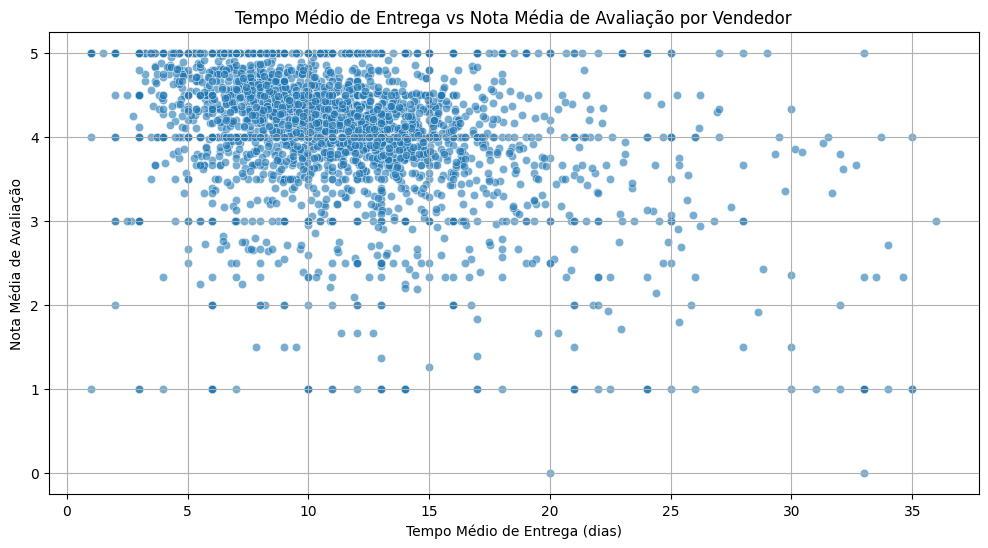


--- Insights da Análise de Vendedores ---
- Identificar os vendedores com maior faturamento e volume de vendas (Campeões de Venda).
- Identificar os vendedores com a melhor satisfação do cliente (maior nota média), que podem ser modelos a seguir para outros vendedores.
- Identificar os vendedores com o menor tempo médio de entrega (os mais eficientes na logística).
- Analisar as relações entre as métricas: Vendedores com alto faturamento têm notas altas? Vendedores rápidos têm notas altas?
- Vendedores com baixo desempenho em alguma métrica específica (ex: baixo faturamento, notas baixas, tempo de entrega longo) precisam de atenção. Quais ações corretivas podem ser tomadas?
- Vendedores que se destacam em todas as métricas (alto faturamento, notas altas, entrega rápida) são os 'Estrelas' e devem ser incentivados.
- Vendedores com alto volume/faturamento mas notas baixas podem estar sacrificando a qualidade ou o serviço pela quantidade.
- Vendedores com notas altas mas baixo volume pod

In [33]:
# Dashboard de Análise de Vendedores

# 1. Volume de Vendas por Vendedor
# Calculando o volume de vendas (quantidade de itens vendidos) e o faturamento por vendedor
seller_sales_volume = df_order_items.groupby('seller_id').size().reset_index(name='volume_vendas')
seller_sales_revenue = df_order_items.groupby('seller_id')['price'].sum().reset_index(name='faturamento_total')

seller_sales_summary = seller_sales_volume.merge(seller_sales_revenue, on='seller_id')
seller_sales_summary_sorted = seller_sales_summary.sort_values(by='faturamento_total', ascending=False)

print("\n--- Vendedores com Melhor Desempenho em Faturamento ---")
print(seller_sales_summary_sorted.head(10))

# Visualizar Top 10 Vendedores por Faturamento
plt.figure(figsize=(14, 7))
sns.barplot(data=seller_sales_summary_sorted.head(10), x='seller_id', y='faturamento_total', palette='viridis')
plt.title('Top 10 Vendedores por Faturamento')
plt.xlabel('ID do Vendedor')
plt.ylabel('Faturamento Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Satisfação do Cliente por Vendedor (Nota Média de Avaliação)
# Mesclar reviews com order_items para conectar avaliações aos vendedores
df_reviews_items = df_order_reviews.merge(df_order_items, on='order_id')

# Calcular a nota média de avaliação por vendedor
seller_review_score = df_reviews_items.groupby('seller_id')['review_score'].mean().reset_index(name='nota_media_avaliacao')

seller_review_score_sorted = seller_review_score.sort_values(by='nota_media_avaliacao', ascending=False)

print("\n--- Vendedores com Melhor Nota Média de Avaliação ---")
print(seller_review_score_sorted.head(10))

# Visualizar Top 10 Vendedores por Nota Média
plt.figure(figsize=(14, 7))
sns.barplot(data=seller_review_score_sorted.head(10), x='seller_id', y='nota_media_avaliacao', palette='plasma')
plt.title('Top 10 Vendedores por Nota Média de Avaliação')
plt.xlabel('ID do Vendedor')
plt.ylabel('Nota Média de Avaliação')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5) # Escala da nota de 0 a 5
plt.tight_layout()
plt.show()

# 3. Tempo de Entrega por Vendedor
# Precisamos mesclar order_items, orders (para datas de entrega/compra) e sellers
df_seller_delivery = df_order_items.merge(df_orders, on='order_id')
df_seller_delivery = df_seller_delivery.merge(df_sellers, on='seller_id')

# Calcular o tempo de entrega para cada item vendido por um vendedor
df_seller_delivery['delivery_time'] = (df_seller_delivery['order_delivered_customer_date'] - df_seller_delivery['order_purchase_timestamp']).dt.days

# Remover linhas com valores nulos no tempo de entrega (pedidos não entregues ou com datas inconsistentes)
df_seller_delivery_cleaned = df_seller_delivery.dropna(subset=['delivery_time']).copy()

# Calcular o tempo médio de entrega por vendedor
seller_avg_delivery_time = df_seller_delivery_cleaned.groupby('seller_id')['delivery_time'].mean().reset_index(name='tempo_medio_entrega_dias')

seller_avg_delivery_time_sorted = seller_avg_delivery_time.sort_values(by='tempo_medio_entrega_dias', ascending=True) # Menor tempo é melhor

print("\n--- Vendedores com Melhor Tempo Médio de Entrega (Menor) ---")
print(seller_avg_delivery_time_sorted.head(10))

# Visualizar Top 10 Vendedores com Melhor Tempo Médio de Entrega
plt.figure(figsize=(14, 7))
sns.barplot(data=seller_avg_delivery_time_sorted.head(10), x='seller_id', y='tempo_medio_entrega_dias', palette='mako')
plt.title('Top 10 Vendedores por Menor Tempo Médio de Entrega')
plt.xlabel('ID do Vendedor')
plt.ylabel('Tempo Médio de Entrega (dias)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análise Combinada: Mesclar as métricas para ter uma visão holística
seller_performance = seller_sales_summary.merge(seller_review_score, on='seller_id', how='left')
seller_performance = seller_performance.merge(seller_avg_delivery_time, on='seller_id', how='left')

# Preencher NAs para vendedores que não tiveram avaliações ou entregas registradas nesta análise
seller_performance['nota_media_avaliacao'].fillna(0, inplace=True) # Pode ser 0 ou a média geral
seller_performance['tempo_medio_entrega_dias'].fillna(seller_performance['tempo_medio_entrega_dias'].max(), inplace=True) # Preencher com um valor alto para indicar pior desempenho

print("\n--- Análise Combinada de Vendedores (Amostra) ---")
print(seller_performance.sort_values(by='faturamento_total', ascending=False).head()) # Exemplo: ordenar por faturamento

# Relação entre Faturamento e Nota Média de Avaliação
plt.figure(figsize=(12, 6))
sns.scatterplot(data=seller_performance, x='faturamento_total', y='nota_media_avaliacao', alpha=0.6)
plt.title('Faturamento vs Nota Média de Avaliação por Vendedor')
plt.xlabel('Faturamento Total')
plt.ylabel('Nota Média de Avaliação')
plt.grid(True)
plt.show()

# Relação entre Tempo Médio de Entrega e Nota Média de Avaliação

seller_performance_filtered_delivery = seller_performance[seller_performance['tempo_medio_entrega_dias'] < seller_performance['tempo_medio_entrega_dias'].quantile(0.95)].copy()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=seller_performance_filtered_delivery, x='tempo_medio_entrega_dias', y='nota_media_avaliacao', alpha=0.6)
plt.title('Tempo Médio de Entrega vs Nota Média de Avaliação por Vendedor')
plt.xlabel('Tempo Médio de Entrega (dias)')
plt.ylabel('Nota Média de Avaliação')
plt.grid(True)
plt.show()

# Insights da Análise de Vendedores:
print("\n--- Insights da Análise de Vendedores ---")
print("- Identificar os vendedores com maior faturamento e volume de vendas (Campeões de Venda).")
print("- Identificar os vendedores com a melhor satisfação do cliente (maior nota média), que podem ser modelos a seguir para outros vendedores.")
print("- Identificar os vendedores com o menor tempo médio de entrega (os mais eficientes na logística).")
print("- Analisar as relações entre as métricas: Vendedores com alto faturamento têm notas altas? Vendedores rápidos têm notas altas?")
print("- Vendedores com baixo desempenho em alguma métrica específica (ex: baixo faturamento, notas baixas, tempo de entrega longo) precisam de atenção. Quais ações corretivas podem ser tomadas?")
print("- Vendedores que se destacam em todas as métricas (alto faturamento, notas altas, entrega rápida) são os 'Estrelas' e devem ser incentivados.")
print("- Vendedores com alto volume/faturamento mas notas baixas podem estar sacrificando a qualidade ou o serviço pela quantidade.")
print("- Vendedores com notas altas mas baixo volume podem ter produtos de nicho ou precisar de suporte em marketing/vendas.")
